Pre-Processing the Data

In [5]:
import re
import pandas as pd

In [6]:
f = open("WhatsApp Chat.txt", "r",encoding="utf8")

In [7]:
data = f.read()

In [8]:
print(data)

24/09/2020, 11:25 am - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
24/09/2020, 11:25 am - Praveen Uppar: <Media omitted>
24/09/2020, 11:25 am - Praveen Uppar: <Media omitted>
24/09/2020, 3:10 pm - Praveen Uppar: <Media omitted>
24/09/2020, 3:15 pm - Praveen Uppar: <Media omitted>
27/09/2020, 7:30 pm - Savi Akka: https://play.google.com/store/apps/details?id=com.innersloth.spacemafia
05/10/2020, 12:51 pm - Praveen Uppar: https://youtu.be/Bfs1BhM6sS8
05/10/2020, 12:52 pm - Praveen Uppar: See this akka I think 😊
05/10/2020, 2:24 pm - Savi Akka: Oda summa kuntha 😌
05/10/2020, 2:25 pm - Praveen Uppar: 👍
05/10/2020, 2:25 pm - Praveen Uppar: 🙏
05/10/2020, 2:27 pm - Savi Akka: 🙌
27/10/2020, 8:08 am - Praveen Uppar: Hello akka
07/11/2020, 6:30 pm - Praveen Uppar: <Media omitted>
07/11/2020, 7:33 pm - Praveen Uppar: <Media omitted>
08/12/2020, 9:28 am - Praveen Uppar: https://youtu.be/3uMJ_5kLbJc
08/1

In [9]:
pattern='\d{1,2}\/\d{1,2}\/\d{2,4},\s\d{1,2}:\d{2}\s(?:am|pm)\s-\s' 

In [10]:
messages = re.split(pattern, data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Praveen Uppar: <Media omitted>\n',
 'Praveen Uppar: <Media omitted>\n',
 'Praveen Uppar: <Media omitted>\n',
 'Praveen Uppar: <Media omitted>\n',
 'Savi Akka: https://play.google.com/store/apps/details?id=com.innersloth.spacemafia\n',
 'Praveen Uppar: https://youtu.be/Bfs1BhM6sS8\n',
 'Praveen Uppar: See this akka I think 😊\n',
 'Savi Akka: Oda summa kuntha 😌\n',
 'Praveen Uppar: 👍\n',
 'Praveen Uppar: 🙏\n',
 'Savi Akka: 🙌\n',
 'Praveen Uppar: Hello akka\n',
 'Praveen Uppar: <Media omitted>\n',
 'Praveen Uppar: <Media omitted>\n',
 'Praveen Uppar: https://youtu.be/3uMJ_5kLbJc\n',
 'Praveen Uppar: https://youtu.be/sdMbVpzIPDg\n',
 'Savi Akka: https://youtu.be/nCNqPgXDYhY\n',
 'Savi Akka: Must watch 💯💯\n',
 'Praveen Uppar: <Media omitted>\n',
 'Praveen Uppar: 💯\n',
 'Savi Akka: Hiiieeeeeeeeee\n',
 'Savi Akka: https://youtu.be/RI58BVpBgfs\n',


In [11]:
len(messages)

4215

In [12]:
dates = re.findall(pattern, data)
dates

['24/09/2020, 11:25\u202fam - ',
 '24/09/2020, 11:25\u202fam - ',
 '24/09/2020, 11:25\u202fam - ',
 '24/09/2020, 3:10\u202fpm - ',
 '24/09/2020, 3:15\u202fpm - ',
 '27/09/2020, 7:30\u202fpm - ',
 '05/10/2020, 12:51\u202fpm - ',
 '05/10/2020, 12:52\u202fpm - ',
 '05/10/2020, 2:24\u202fpm - ',
 '05/10/2020, 2:25\u202fpm - ',
 '05/10/2020, 2:25\u202fpm - ',
 '05/10/2020, 2:27\u202fpm - ',
 '27/10/2020, 8:08\u202fam - ',
 '07/11/2020, 6:30\u202fpm - ',
 '07/11/2020, 7:33\u202fpm - ',
 '08/12/2020, 9:28\u202fam - ',
 '08/12/2020, 9:29\u202fam - ',
 '23/01/2021, 11:14\u202fpm - ',
 '23/01/2021, 11:15\u202fpm - ',
 '19/02/2021, 9:40\u202fpm - ',
 '19/02/2021, 9:40\u202fpm - ',
 '12/03/2021, 4:19\u202fpm - ',
 '08/04/2021, 7:41\u202fam - ',
 '18/04/2021, 7:57\u202fam - ',
 '18/04/2021, 10:12\u202fpm - ',
 '18/04/2021, 10:44\u202fpm - ',
 '18/04/2021, 10:44\u202fpm - ',
 '24/04/2021, 1:55\u202fpm - ',
 '01/05/2021, 9:48\u202fam - ',
 '05/05/2021, 6:06\u202fpm - ',
 '17/05/2021, 1:16\u202fpm - '

In [13]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %I:%M %p - ')
df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()


,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2020-09-24 11:25:00
1,Praveen Uppar: <Media omitted>\n,2020-09-24 11:25:00
2,Praveen Uppar: <Media omitted>\n,2020-09-24 11:25:00
3,Praveen Uppar: <Media omitted>\n,2020-09-24 15:10:00
4,Praveen Uppar: <Media omitted>\n,2020-09-24 15:15:00


In [14]:
df.shape

(4215, 2)

In [15]:
users = []
messages_list = []  # Rename this to avoid conflict

for message in df['user_message']:  # Use a different loop variable name
    entry = re.split(r'([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages_list.append(entry[2])
    else:
        users.append('Notification')
        messages_list.append(entry[0])

df['user'] = users
df['message'] = messages_list
df.drop(columns=['user_message'], inplace=True)

df.head()


,date,user,message
0,2020-09-24 11:25:00,Notification,Messages and calls are end-to-end encrypted. N...
1,2020-09-24 11:25:00,Praveen Uppar,<Media omitted>\n
2,2020-09-24 11:25:00,Praveen Uppar,<Media omitted>\n
3,2020-09-24 15:10:00,Praveen Uppar,<Media omitted>\n
4,2020-09-24 15:15:00,Praveen Uppar,<Media omitted>\n


In [16]:
df['year'] = df['date'].dt.year

In [17]:
df.head()

,date,user,message,year
0,2020-09-24 11:25:00,Notification,Messages and calls are end-to-end encrypted. N...,2020
1,2020-09-24 11:25:00,Praveen Uppar,<Media omitted>\n,2020
2,2020-09-24 11:25:00,Praveen Uppar,<Media omitted>\n,2020
3,2020-09-24 15:10:00,Praveen Uppar,<Media omitted>\n,2020
4,2020-09-24 15:15:00,Praveen Uppar,<Media omitted>\n,2020


In [18]:
df['month'] = df['date'].dt.month

In [19]:
df['day'] = df['date'].dt.day

In [20]:
df['hour'] = df['date'].dt.hour

In [21]:
df['minute'] = df['date'].dt.minute

In [22]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2020-09-24 11:25:00,Notification,Messages and calls are end-to-end encrypted. N...,2020,9,24,11,25
1,2020-09-24 11:25:00,Praveen Uppar,<Media omitted>\n,2020,9,24,11,25
2,2020-09-24 11:25:00,Praveen Uppar,<Media omitted>\n,2020,9,24,11,25
3,2020-09-24 15:10:00,Praveen Uppar,<Media omitted>\n,2020,9,24,15,10
4,2020-09-24 15:15:00,Praveen Uppar,<Media omitted>\n,2020,9,24,15,15


Analysis of Data

In [23]:
df[df['user'] == 'Praveen Uppar'].shape

(2310, 8)

In [24]:
words = []
for message in df['message']:
    words.extend(message.split())

In [25]:
len(words)

16173

To Extract the URL from the data

In [26]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("google.com")

In [27]:
y = []
for message in df['message']:
    y.extend(extractor.find_urls(message))

In [28]:
len(y)

77

In [29]:
x = df['user'].value_counts().head()

In [30]:
import matplotlib.pyplot as plt

In [31]:
name = x.index
count = x.values

<BarContainer object of 3 artists>

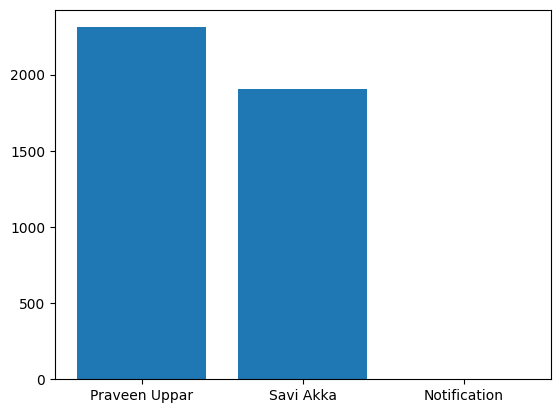

In [32]:
plt.bar(name, count)

WordCloud --> A word cloud is a visual representation (image) of word data. In other words, it is a collection, or cluster, of words depicted in different sizes.

In [33]:
words = []
for message in df['message']:
    words.extend(message.split())

In [34]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(10), columns=['word', 'frequency'])

,word,frequency
0,<Media,661
1,omitted>,661
2,I,481
3,you,306
4,to,285
5,and,257
6,will,245
7,the,191
8,is,174
9,in,173


In [38]:
!pip install emoji

In [46]:
import emoji

In [49]:
import emoji

emojis = []
for message in df['message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])

print(emojis)


['😊', '😌', '👍', '🙏', '🙌', '💯', '💯', '💯', '🤯', '🤯', '🤯', '🙀', '🙀', '🙀', '👍', '👍', '👍', '💤', '😀', '😎', '😂', '😂', '😂', '✌', '🏻', '🤌', '🤌', '👌', '👌', '🤝', '🤝', '😘', '😘', '😍', '😍', '😂', '😂', '😂', '😂', '😂', '😂', '🤑', '🤑', '😂', '😂', '👍', '👍', '👍', '😂', '😎', '👍', '👍', '🍿', '🤣', '🤣', '😂', '😂', '😂', '😊', '🥰', '🫃', '😂', '🫂', '😎', '😘', '😘', '😘', '❤', '👆', '😑', '👆', '👍', '😊', '👆', '😂', '😂', '😂', '👀', '👍', '😂', '😎', '😂', '😂', '😂', '😂', '😂', '🤷', '♂', '👍', '👌', '😂', '😂', '😊', '😊', '😊', '😂', '😂', '😂', '😑', '😑', '😶', '😂', '😂', '😘', '🤘', '🤘', '🥲', '😂', '😂', '😂', '😂', '😂', '🥳', '🥳', '🥳', '🥳', '🏠', '😂', '😂', '😂', '🙃', '🙃', '😂', '😂', '😂', '😂', '🥹', '🥹', '🥹', '🤘', '🤘', '🥳', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '👍', '💀', '😂', '😂', '😶', '😶', '😶', '🥹', '👌', '👌', '👌', '🫡', '🫡', '🫡', '🫡', '🌝', '🫣', '😅', '😅', '👍', '🥲', '🥹', '🥹', '😊', '😂', '😂', '👍', '👆', '👆', '👆', '👆', '👆', '👆', '👆', '👆', '👆', '💀', '🎯', '👆', '👍', '😁', '😁', '✨', '🌺', '✨', '😶', '😶', '😂', '😂', '👊', '👊', '😂', '😂', '😂', '😂', '😎', '😎', '😂', '😂',

In [50]:
pd.DataFrame(Counter(emojis).most_common(), columns=['emoji', 'frequency'])

,emoji,frequency
0,😂,155
1,👍,31
2,🤣,28
3,😭,25
4,😶,19
...,...,...
64,😠,1
65,📱,1
66,💅,1
67,☠,1


In [54]:
df['month_num'] = df['date'].dt.month

In [62]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [63]:
timeline

,year,month_num,month,message
0,2020,9,9,6
1,2020,10,10,7
2,2020,11,11,2
3,2020,12,12,2
4,2021,1,1,2
5,2021,2,2,2
6,2021,3,3,1
7,2021,4,4,6
8,2021,5,5,8
9,2021,6,6,5


In [80]:
import calendar

# Map month numbers to month names
timeline['month_name'] = timeline['month_num'].apply(lambda x: calendar.month_name[x])

# Combine month name and year into a single column
timeline['timeline'] = timeline['month_name'] + ' ' + timeline['year'].astype(str)

# Display the updated timeline DataFrame
print(timeline)


    year  month_num  month  message month_name        timeline
0   2020          9      9        6  September  September 2020
1   2020         10     10        7    October    October 2020
2   2020         11     11        2   November   November 2020
3   2020         12     12        2   December   December 2020
4   2021          1      1        2    January    January 2021
5   2021          2      2        2   February   February 2021
6   2021          3      3        1      March      March 2021
7   2021          4      4        6      April      April 2021
8   2021          5      5        8        May        May 2021
9   2021          6      6        5       June       June 2021
10  2021          7      7        1       July       July 2021
11  2021          8      8        5     August     August 2021
12  2021         10     10        2    October    October 2021
13  2023          5      5        3        May        May 2023
14  2023          6      6        2       June       Ju

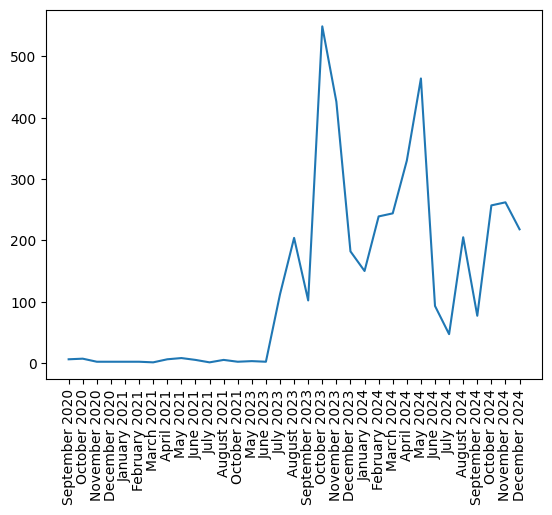

In [82]:
plt.plot(timeline['timeline'], timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [83]:
df['only_date'] = df['date'].dt.date

In [84]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

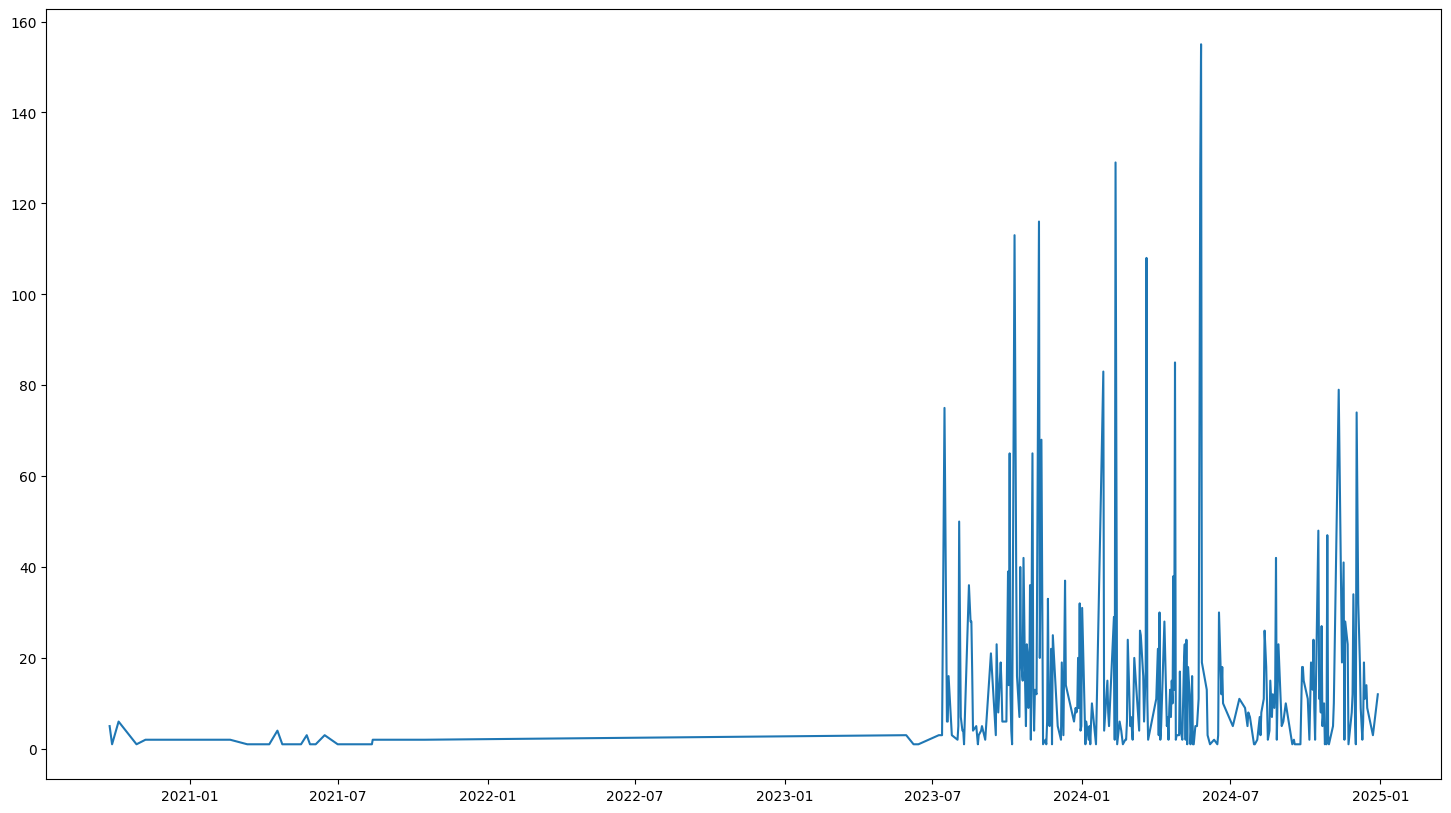

In [90]:
plt.figure(figsize=(18, 10))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])

In [91]:
df['day_name'] = df['date'].dt.day_name()

In [92]:
df['day_name'].value_counts()

day_name
Sunday       776
Monday       679
Thursday     642
Wednesday    577
Tuesday      534
Saturday     511
Friday       496
Name: count, dtype: int64

In [99]:
df['month'] = df['date'].dt.month_name()

In [100]:
df['month'].value_counts()

month
October      815
November     690
May          475
August       414
December     402
April        336
March        245
February     241
September    185
July         160
January      152
June         100
Name: count, dtype: int64